In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from scipy import stats


In [10]:
fg_df = pd.read_csv("/content/fear_greed_index.csv")

print("=" * 55)
print(" FEAR / GREED DATASET — Raw Overview")
print("=" * 55)
print(f"  Shape         : {fg_df.shape[0]} rows × {fg_df.shape[1]} columns")
print(f"  Columns       : {list(fg_df.columns)}")
print(f"\n  Data Types:\n{fg_df.dtypes.to_string()}")
print(f"\n  Missing Values:\n{fg_df.isnull().sum().to_string()}")
print(f"\n  Duplicates    : {fg_df.duplicated().sum()} rows")
print("\n  First 5 rows:")
display(fg_df.head())

 FEAR / GREED DATASET — Raw Overview
  Shape         : 2644 rows × 4 columns
  Columns       : ['timestamp', 'value', 'classification', 'date']

  Data Types:
timestamp          int64
value              int64
classification    object
date              object

  Missing Values:
timestamp         0
value             0
classification    0
date              0

  Duplicates    : 0 rows

  First 5 rows:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [11]:
hl_df = pd.read_csv("/content/historical_data.csv")

print("=" * 55)
print("📂  HYPERLIQUID TRADER DATASET — Raw Overview")
print("=" * 55)
print(f"  Shape         : {hl_df.shape[0]} rows × {hl_df.shape[1]} columns")
print(f"  Columns       : {list(hl_df.columns)}")
print(f"\n  Data Types:\n{hl_df.dtypes.to_string()}")
print(f"\n  Missing Values:\n{hl_df.isnull().sum().to_string()}")
print(f"\n  Duplicates    : {hl_df.duplicated().sum()} rows")
print("\n  First 5 rows:")
display(hl_df.head())

📂  HYPERLIQUID TRADER DATASET — Raw Overview
  Shape         : 211224 rows × 16 columns
  Columns       : ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']

  Data Types:
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64

  Missing Values:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Clo

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [12]:
summary_data = {
    "Dataset"        : ["Fear/Greed Index", "Hyperliquid Trades"],
    "Rows"           : [fg_df.shape[0], hl_df.shape[0]],
    "Columns"        : [fg_df.shape[1], hl_df.shape[1]],
    "Missing Values" : [fg_df.isnull().sum().sum(), hl_df.isnull().sum().sum()],
    "Duplicates"     : [fg_df.duplicated().sum(), hl_df.duplicated().sum()],
}

summary_table = pd.DataFrame(summary_data)
print("=" * 55)
print("📋  COMBINED DATASET SUMMARY")
print("=" * 55)
display(summary_table)

📋  COMBINED DATASET SUMMARY


,Dataset,Rows,Columns,Missing Values,Duplicates
0,Fear/Greed Index,2644,4,0,0
1,Hyperliquid Trades,211224,16,0,0


In [13]:
fg_clean = fg_df.copy()

fg_clean.columns = [c.strip().lower().replace(" ", "_") for c in fg_clean.columns]
print("Renamed columns:", list(fg_clean.columns))

Renamed columns: ['timestamp', 'value', 'classification', 'date']


In [14]:
date_col = "date"
class_col = "classification"

fg_clean = fg_clean.rename(columns={date_col: "date", class_col: "classification"})

fg_clean["date"] = pd.to_datetime(fg_clean["date"])

In [15]:
fg_clean["classification"] = (
    fg_clean["classification"]
    .astype(str)
    .str.strip()
    .str.title()  # -> "Fear", "Greed", "Extreme Fear", "Extreme Greed"
)


In [16]:
mapping = {
    "Fear": "Fear",
    "Extreme Fear": "Fear",
    "Greed": "Greed",
    "Extreme Greed": "Greed",
    "Neutral": "Neutral"
}

fg_clean["sentiment"] = fg_clean["classification"].map(mapping)

In [17]:
# ▸ Step 6: Drop nulls and duplicates
before = len(fg_clean)
fg_clean = fg_clean.dropna(subset=["date", "sentiment"]).drop_duplicates(subset=["date"])
after = len(fg_clean)

In [18]:
fg_clean = fg_clean.sort_values("date").reset_index(drop=True)

print("=" * 55)
print("✅  Fear/Greed — Cleaning Complete")
print("=" * 55)
print(f"  Rows before: {before}  →  Rows after: {after}")
print(f"  Date range : {fg_clean['date'].min().date()}  →  {fg_clean['date'].max().date()}")
print(f"  Sentiment distribution:\n{fg_clean['sentiment'].value_counts().to_string()}")
print(f"\n  Detailed Classification:\n{fg_clean['classification'].value_counts().to_string()}")
display(fg_clean.head())

✅  Fear/Greed — Cleaning Complete
  Rows before: 2644  →  Rows after: 2644
  Date range : 2018-02-01  →  2025-05-02
  Sentiment distribution:
sentiment
Fear       1289
Greed       959
Neutral     396

  Detailed Classification:
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326


,timestamp,value,classification,date,sentiment
0,1517463000,30,Fear,2018-02-01,Fear
1,1517549400,15,Extreme Fear,2018-02-02,Fear
2,1517635800,40,Fear,2018-02-03,Fear
3,1517722200,24,Extreme Fear,2018-02-04,Fear
4,1517808600,11,Extreme Fear,2018-02-05,Fear


In [19]:
hl_clean = hl_df.copy()

# ▸ Step 1: Normalize column names
hl_clean.columns = [c.strip().lower().replace(" ", "_") for c in hl_clean.columns]
print("Hyperliquid columns (normalized):", list(hl_clean.columns))

Hyperliquid columns (normalized): ['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp']


In [20]:
# ▸ Step 2: Identify the timestamp column (usually 'time' or 'timestamp')
time_col = [c for c in hl_clean.columns if "time" in c][0]
print(f"\nDetected time column: '{time_col}'")
print(f"Sample time values: {hl_clean[time_col].head(3).tolist()}")


Detected time column: 'timestamp_ist'
Sample time values: ['02-12-2024 22:50', '02-12-2024 22:50', '02-12-2024 22:50']


In [22]:
time_col = "timestamp"

# convert to number
hl_clean[time_col] = pd.to_numeric(hl_clean[time_col], errors="coerce")

sample_val = hl_clean[time_col].dropna().iloc[0]

if sample_val > 1e12:
    hl_clean["datetime"] = pd.to_datetime(hl_clean[time_col], unit="ms")
else:
    hl_clean["datetime"] = pd.to_datetime(hl_clean[time_col], unit="s")

hl_clean["date"] = hl_clean["datetime"].dt.date

hl_clean[["datetime", "date"]].head()

,datetime,date
0,2024-10-27 03:33:20,2024-10-27
1,2024-10-27 03:33:20,2024-10-27
2,2024-10-27 03:33:20,2024-10-27
3,2024-10-27 03:33:20,2024-10-27
4,2024-10-27 03:33:20,2024-10-27


In [23]:
hl_clean["date"] = hl_clean["datetime"].dt.normalize()

In [24]:
print(f"\n  Datetime range: {hl_clean['datetime'].min()}  →  {hl_clean['datetime'].max()}")


  Datetime range: 2023-03-28 10:40:00  →  2025-06-15 15:06:40


In [25]:
if "side" in hl_clean.columns:
    side_map = {
        "b": "Long", "buy": "Long", "long": "Long", "A": "Long",
        "s": "Short", "sell": "Short", "short": "Short", "B": "Short",
    }
    hl_clean["side"] = (
        hl_clean["side"]
        .astype(str).str.strip().str.lower()
        .map(lambda x: "Long" if x in ["b", "buy", "long"] else ("Short" if x in ["s", "sell", "short"] else x))
    )
    print(f"\n  Side values after cleaning: {hl_clean['side'].unique()}")


  Side values after cleaning: ['Long' 'Short']


In [26]:
# ▸ Step 6: Convert numeric columns
numeric_cols = ["closedpnl", "size", "leverage", "execution_price", "start_position"]
# Adjust these names to match your actual column names
for col in numeric_cols:
    if col in hl_clean.columns:
        hl_clean[col] = pd.to_numeric(hl_clean[col], errors="coerce")

In [27]:
pnl_col = [c for c in hl_clean.columns if "pnl" in c.lower()][0]
print(f"\nDetected PnL column: '{pnl_col}'")


Detected PnL column: 'closed_pnl'


In [28]:
before = len(hl_clean)
hl_clean = hl_clean.dropna(subset=[pnl_col])
after = len(hl_clean)
print(f"  Rows after dropping null PnL: {before} → {after}")


  Rows after dropping null PnL: 211224 → 211224


In [29]:
hl_clean = hl_clean.rename(columns={pnl_col: "closed_pnl"})

In [31]:
col_renames = {}
for c in hl_clean.columns:
    if "account" in c: col_renames[c] = "account"
    if "symbol" in c:  col_renames[c] = "symbol"
    if "size" in c and "start" not in c: col_renames[c] = "size"
    if "leverage" in c: col_renames[c] = "leverage"
hl_clean = hl_clean.rename(columns=col_renames)

print("\n Hyperliquid — Cleaning Complete")
print(f"  Final shape: {hl_clean.shape}")
print(f"  Final columns: {list(hl_clean.columns)}")
display(hl_clean.head())


 Hyperliquid — Cleaning Complete
  Final shape: (211224, 18)
  Final columns: ['account', 'coin', 'execution_price', 'size', 'size', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'datetime', 'date']


,account,coin,execution_price,size,size,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,datetime,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,Long,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,Long,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,Long,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,Long,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,Long,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27


In [32]:
print("  CLEANING REPORT CARD")
print("=" * 55)
print(f"  Fear/Greed  →  {len(fg_clean)} rows | {fg_clean['date'].min().date()} to {fg_clean['date'].max().date()}")
print(f"  Hyperliquid →  {len(hl_clean)} rows | {hl_clean['date'].min().date()} to {hl_clean['date'].max().date()}")

overlap_start = max(fg_clean["date"].min(), hl_clean["date"].min())
overlap_end   = min(fg_clean["date"].max(), hl_clean["date"].max())
print(f"\n  Overlapping date range: {overlap_start.date()} → {overlap_end.date()}")
overlap_days = (overlap_end - overlap_start).days
print(f"  Overlap = {overlap_days} days")

  CLEANING REPORT CARD
  Fear/Greed  →  2644 rows | 2018-02-01 to 2025-05-02
  Hyperliquid →  211224 rows | 2023-03-28 to 2025-06-15

  Overlapping date range: 2023-03-28 → 2025-05-02
  Overlap = 766 days


In [35]:
hl_clean.head()

,account,coin,execution_price,size,size,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,datetime,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,Long,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,Long,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,Long,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,Long,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,Long,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27


In [36]:
cols = list(hl_clean.columns)

cols[3] = "size_tokens"
cols[4] = "size_usd"

hl_clean.columns = cols

In [37]:
print(hl_clean.columns)

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'datetime', 'date'],
      dtype='object')


In [39]:
daily_df = (
    hl_clean.groupby(["account", "date"])
    .agg(
        daily_pnl        = ("closed_pnl", "sum"),
        trade_count      = ("closed_pnl", "count"),
        win_count        = ("closed_pnl", lambda x: (x > 0).sum()),
        avg_size_tokens  = ("size_tokens", "mean"),
        avg_size_usd     = ("size_usd", "mean"),
        long_count       = ("side", lambda x: (x == "Long").sum()),
        short_count      = ("side", lambda x: (x == "Short").sum()),
        best_trade_pnl   = ("closed_pnl", "max"),
        worst_trade_pnl  = ("closed_pnl", "min"),
    )
    .reset_index()
)


In [41]:
daily_df["win_rate"] = daily_df["win_count"] / daily_df["trade_count"]
daily_df["long_short_ratio"] = daily_df["long_count"] / (daily_df["long_count"] + daily_df["short_count"]).replace(0, np.nan)
daily_df["is_winner"] = (daily_df["daily_pnl"] > 0).astype(int)

print("=" * 55)
print("📊  DAILY AGGREGATED METRICS — Overview")
print("=" * 55)
print(f"  Shape: {daily_df.shape}")
display(daily_df.head(10))
print(f"\n  Summary Statistics:")
display(daily_df.describe().round(3))

📊  DAILY AGGREGATED METRICS — Overview
  Shape: (102, 14)


,account,date,daily_pnl,trade_count,win_count,avg_size_tokens,avg_size_usd,long_count,short_count,best_trade_pnl,worst_trade_pnl,win_rate,long_short_ratio,is_winner
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-3.275059e+05,462,12,12.296537,14810.891818,139,323,883.756968,-117990.104100,0.025974,0.300866,0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1.927736e+06,3356,1361,16.700056,16345.241940,1572,1784,135329.090100,-19841.240140,0.405542,0.468415,1
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,2.060745e+04,320,170,129.539614,2492.749906,145,175,2325.688450,0.000000,0.531250,0.453125,1
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,1.709873e+04,3533,1537,851.795876,1693.351684,1528,2005,4037.871978,-6820.769550,0.435041,0.432494,1
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-06-15,1.017915e+04,3427,1516,178.432124,1533.468395,1382,2045,549.000000,-1162.026288,0.442369,0.403268,1
5,0x271b280974205ca63b716753467d5a371de622ab,2024-07-03,-1.000000e+00,5,0,40.000000,6070.200000,2,3,0.000000,-0.620400,0.000000,0.400000,0
6,0x271b280974205ca63b716753467d5a371de622ab,2024-10-27,1.793160e+03,5,4,83.098920,31941.660000,3,2,1584.342755,0.000000,0.800000,0.600000,1
7,0x271b280974205ca63b716753467d5a371de622ab,2025-02-19,2.997093e+04,1136,489,25.691709,10836.900968,506,630,1265.820644,-122.029740,0.430458,0.445423,1
8,0x271b280974205ca63b716753467d5a371de622ab,2025-06-15,-1.021993e+05,2663,657,261.434271,8025.783560,1055,1608,1219.480108,-25818.750120,0.246714,0.396170,0
9,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,2024-10-27,1.218804e+05,6472,2872,2773.333275,483.590114,3086,3386,4396.862703,-240.452221,0.443758,0.476823,1



  Summary Statistics:


,date,daily_pnl,trade_count,win_count,avg_size_tokens,avg_size_usd,long_count,short_count,best_trade_pnl,worst_trade_pnl,win_rate,long_short_ratio,is_winner
count,102,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000
mean,2024-12-25 17:24:42.352941056,100950.578,2070.824,851.657,5042.474,5771.204,1006.824,1064.000,8717.140,-5738.138,0.386,0.476,0.804
min,2023-03-28 00:00:00,-363924.918,2.000,0.000,0.061,7.020,0.000,0.000,0.000,-117990.104,0.000,0.000,0.000
25%,2024-10-27 00:00:00,126.583,157.750,36.500,83.407,1368.425,47.500,79.750,595.020,-3722.818,0.245,0.397,1.000
50%,2025-02-19 00:00:00,18485.263,548.500,206.500,772.104,2709.532,233.500,274.500,2348.089,-188.887,0.388,0.471,1.000
75%,2025-02-19 00:00:00,99944.114,3052.250,881.250,2677.109,6923.093,1402.250,1606.500,7359.352,0.000,0.495,0.586,1.000
max,2025-06-15 00:00:00,1927735.720,26651.000,10257.000,87290.224,41153.696,12568.000,14083.000,135329.090,1.860,1.000,1.000,1.000
std,NaN,282645.068,3796.503,1639.190,12778.327,7819.745,1888.675,1954.795,18228.201,15703.460,0.249,0.238,0.399


In [42]:
daily_df["date"] = pd.to_datetime(daily_df["date"])
fg_clean["date"] = pd.to_datetime(fg_clean["date"])

# Left join: keep all trade days, attach sentiment where available
master_df = daily_df.merge(
    fg_clean[["date", "sentiment", "classification"]],
    on="date",
    how="left"
)

In [43]:
matched   = master_df["sentiment"].notna().sum()
unmatched = master_df["sentiment"].isna().sum()
print("=" * 55)
print("🔗  MERGE REPORT")
print("=" * 55)
print(f"  Total rows in merged df : {len(master_df)}")
print(f"  Rows WITH sentiment     : {matched}  ({matched/len(master_df)*100:.1f}%)")
print(f"  Rows WITHOUT sentiment  : {unmatched}  ({unmatched/len(master_df)*100:.1f}%)")


🔗  MERGE REPORT
  Total rows in merged df : 102
  Rows WITH sentiment     : 77  (75.5%)
  Rows WITHOUT sentiment  : 25  (24.5%)


In [44]:
master_df = master_df.dropna(subset=["sentiment"]).reset_index(drop=True)
print(f"  Rows after dropping unmatched: {len(master_df)}")
print(f"\n  Sentiment distribution:\n{master_df['sentiment'].value_counts().to_string()}")
display(master_df.head())

  Rows after dropping unmatched: 77

  Sentiment distribution:
sentiment
Greed      37
Fear       32
Neutral     8


,account,date,daily_pnl,trade_count,win_count,avg_size_tokens,avg_size_usd,long_count,short_count,best_trade_pnl,worst_trade_pnl,win_rate,long_short_ratio,is_winner,sentiment,classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-3.275059e+05,462,12,12.296537,14810.891818,139,323,883.756968,-117990.10410,0.025974,0.300866,0,Greed,Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1.927736e+06,3356,1361,16.700056,16345.241940,1572,1784,135329.090100,-19841.24014,0.405542,0.468415,1,Fear,Fear
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,2.060745e+04,320,170,129.539614,2492.749906,145,175,2325.688450,0.00000,0.531250,0.453125,1,Greed,Greed
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,1.709873e+04,3533,1537,851.795876,1693.351684,1528,2005,4037.871978,-6820.76955,0.435041,0.432494,1,Fear,Fear
4,0x271b280974205ca63b716753467d5a371de622ab,2024-07-03,-1.000000e+00,5,0,40.000000,6070.200000,2,3,0.000000,-0.62040,0.000000,0.400000,0,Neutral,Neutral


In [45]:
# ── 10a: Per-account overall stats (used for segmentation)
account_stats = (
    master_df.groupby("account")
    .agg(
        total_pnl       = ("daily_pnl", "sum"),
        total_trades    = ("trade_count", "sum"),
        overall_wr      = ("win_rate", "mean"),
        pnl_std         = ("daily_pnl", "std"),
        mean_trade_size = ("avg_size_usd", "mean"),   # or avg_size_tokens if you prefer
        trading_days    = ("date", "nunique"),
        total_longs     = ("long_count", "sum"),
        total_shorts    = ("short_count", "sum"),
    )
    .reset_index()
)

In [46]:
# Long/Short Ratio (we create it ourselves)

account_stats["avg_ls_ratio"] = (
    account_stats["total_longs"] /
    (account_stats["total_longs"] + account_stats["total_shorts"])
)

In [47]:
# Frequency bucket (based on total trades)

freq_median = account_stats["total_trades"].median()

account_stats["freq_bucket"] = account_stats["total_trades"].apply(
    lambda x: "Frequent" if x > freq_median else "Infrequent"
)

In [48]:
# Winner segment

def classify_winner(row):
    if row["total_pnl"] > 0 and row["overall_wr"] >= 0.5:
        return "Consistent Winner"
    elif row["total_pnl"] < 0 and row["overall_wr"] < 0.5:
        return "Consistent Loser"
    else:
        return "Mixed"

account_stats["winner_segment"] = account_stats.apply(classify_winner, axis=1)

In [49]:
print("=" * 55)
print("👥  ACCOUNT SEGMENTS — Distribution")
print("=" * 55)

print(f"\nFrequency Buckets:\n{account_stats['freq_bucket'].value_counts().to_string()}")
print(f"\nWinner Segments:\n{account_stats['winner_segment'].value_counts().to_string()}")

display(account_stats.head(10))

👥  ACCOUNT SEGMENTS — Distribution

Frequency Buckets:
freq_bucket
Frequent      16
Infrequent    16

Winner Segments:
winner_segment
Mixed                27
Consistent Winner     4
Consistent Loser      1


,account,total_pnl,total_trades,overall_wr,pnl_std,mean_trade_size,trading_days,total_longs,total_shorts,avg_ls_ratio,freq_bucket,winner_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,1.600230e+06,3818,0.215758,1.594697e+06,15578.066879,2,1711,2107,0.448140,Frequent,Mixed
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,3.770617e+04,3853,0.483146,2.481039e+03,2093.050795,2,1673,2180,0.434207,Frequent,Mixed
2,0x271b280974205ca63b716753467d5a371de622ab,3.176309e+04,1146,0.410153,1.681032e+04,16282.920323,3,511,635,0.445899,Infrequent,Mixed
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,1.323155e+05,13266,0.438246,7.880372e+04,508.413964,2,6692,6574,0.504447,Frequent,Mixed
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,1.686280e+05,3234,0.504117,4.539380e+04,3073.413160,2,1177,2057,0.363946,Frequent,Consistent Winner
5,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-2.770457e+04,617,0.194149,3.096441e+04,5212.250799,6,174,443,0.282010,Infrequent,Consistent Loser
6,0x39cef799f8b69da1995852eea189df24eb5cae3c,1.445692e+04,3589,0.423541,3.925139e+04,4677.615483,2,1648,1941,0.459181,Frequent,Mixed
7,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,5.349625e+04,332,0.486948,2.706169e+04,3562.323166,2,170,162,0.512048,Infrequent,Mixed
8,0x420ab45e0bd8863569a5efbb9c05d91f40624641,1.995056e+05,383,0.230093,1.182993e+05,5522.192161,2,101,282,0.263708,Infrequent,Mixed
9,0x430f09841d65beb3f27765503d0f850b8bce7713,4.165419e+05,1051,0.579597,7.250913e+04,3111.662097,4,302,749,0.287345,Infrequent,Consistent Winner


In [50]:
# ── 10e: Merge segment labels back into master_df
master_df = master_df.merge(
    account_stats[[
        "account",
        "freq_bucket",
        "winner_segment",
        "total_pnl",
        "total_trades",
        "overall_wr",
        "pnl_std",
        "mean_trade_size",
        "avg_ls_ratio"
    ]],
    on="account",
    how="left"
)

In [52]:
# Sentiment binary column

master_df["sentiment_binary"] = (master_df["sentiment"] == "Greed").astype(int)

print(f"\n master_df final shape: {master_df.shape}")
print(f"   Columns: {list(master_df.columns)}")

display(master_df.head())


 master_df final shape: (77, 25)
   Columns: ['account', 'date', 'daily_pnl', 'trade_count', 'win_count', 'avg_size_tokens', 'avg_size_usd', 'long_count', 'short_count', 'best_trade_pnl', 'worst_trade_pnl', 'win_rate', 'long_short_ratio', 'is_winner', 'sentiment', 'classification', 'freq_bucket', 'winner_segment', 'total_pnl', 'total_trades', 'overall_wr', 'pnl_std', 'mean_trade_size', 'avg_ls_ratio', 'sentiment_binary']


,account,date,daily_pnl,trade_count,win_count,avg_size_tokens,avg_size_usd,long_count,short_count,best_trade_pnl,...,classification,freq_bucket,winner_segment,total_pnl,total_trades,overall_wr,pnl_std,mean_trade_size,avg_ls_ratio,sentiment_binary
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-3.275059e+05,462,12,12.296537,14810.891818,139,323,883.756968,...,Greed,Frequent,Mixed,1.600230e+06,3818,0.215758,1.594697e+06,15578.066879,0.448140,1
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1.927736e+06,3356,1361,16.700056,16345.241940,1572,1784,135329.090100,...,Fear,Frequent,Mixed,1.600230e+06,3818,0.215758,1.594697e+06,15578.066879,0.448140,0
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,2.060745e+04,320,170,129.539614,2492.749906,145,175,2325.688450,...,Greed,Frequent,Mixed,3.770617e+04,3853,0.483146,2.481039e+03,2093.050795,0.434207,1
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,1.709873e+04,3533,1537,851.795876,1693.351684,1528,2005,4037.871978,...,Fear,Frequent,Mixed,3.770617e+04,3853,0.483146,2.481039e+03,2093.050795,0.434207,0
4,0x271b280974205ca63b716753467d5a371de622ab,2024-07-03,-1.000000e+00,5,0,40.000000,6070.200000,2,3,0.000000,...,Neutral,Infrequent,Mixed,3.176309e+04,1146,0.410153,1.681032e+04,16282.920323,0.445899,0


In [53]:
import os
os.makedirs("outputs/tables", exist_ok=True)
os.makedirs("outputs/charts", exist_ok=True)

master_df.to_csv("outputs/tables/master_df.csv", index=False)
account_stats.to_csv("outputs/tables/account_stats.csv", index=False)

print("✅  master_df saved to outputs/tables/master_df.csv")
print("✅  account_stats saved to outputs/tables/account_stats.csv")


✅  master_df saved to outputs/tables/master_df.csv
✅  account_stats saved to outputs/tables/account_stats.csv


In [54]:
perf_table = (
    master_df.groupby("sentiment")
    .agg(
        mean_daily_pnl    = ("daily_pnl",        "mean"),
        median_daily_pnl  = ("daily_pnl",        "median"),
        mean_win_rate     = ("win_rate",          "mean"),
        mean_drawdown     = ("worst_trade_pnl",   "mean"),  # Proxy: worst trade per day
        pct_profitable    = ("is_winner",         "mean"),   # Fraction of profitable days
        total_obs         = ("daily_pnl",         "count"),
    )
    .reset_index()
    .round(4)
)

perf_table["pct_profitable"] = (perf_table["pct_profitable"] * 100).round(1).astype(str) + "%"

print("=" * 60)
print("📊  Q1 — PERFORMANCE BY SENTIMENT")
print("=" * 60)
display(perf_table)

📊  Q1 — PERFORMANCE BY SENTIMENT


,sentiment,mean_daily_pnl,median_daily_pnl,mean_win_rate,mean_drawdown,pct_profitable,total_obs
0,Fear,209372.6622,81389.6825,0.4159,-7261.4507,93.8%,32
1,Greed,90988.7034,20925.5132,0.3690,-4921.2541,78.4%,37
2,Neutral,19842.7973,-0.4186,0.2607,-4563.5693,50.0%,8


In [55]:
fear_pnl  = master_df[master_df["sentiment"] == "Fear"]["daily_pnl"].dropna()
greed_pnl = master_df[master_df["sentiment"] == "Greed"]["daily_pnl"].dropna()

u_stat, p_val = stats.mannwhitneyu(fear_pnl, greed_pnl, alternative="two-sided")

print("=" * 60)
print(" MANN-WHITNEY U TEST — Daily PnL: Fear vs Greed")
print("=" * 60)
print(f"  U-statistic : {u_stat:.2f}")
print(f"  p-value     : {p_val:.4f}")
if p_val < 0.05:
    print("  SIGNIFICANT difference (p < 0.05)")
else:
    print("  No statistically significant difference (p ≥ 0.05)")

# Effect size — Rank-Biserial Correlation
n1, n2 = len(fear_pnl), len(greed_pnl)
r = 1 - (2 * u_stat) / (n1 * n2)
print(f"  Effect size (rank-biserial r) : {r:.3f}  {'(small)' if abs(r)<0.3 else '(medium)' if abs(r)<0.5 else '(large)'}")


 MANN-WHITNEY U TEST — Daily PnL: Fear vs Greed
  U-statistic : 798.00
  p-value     : 0.0134
  SIGNIFICANT difference (p < 0.05)
  Effect size (rank-biserial r) : -0.348  (medium)


In [57]:
plot_df = master_df[master_df["sentiment"].isin(["Fear", "Greed"])]

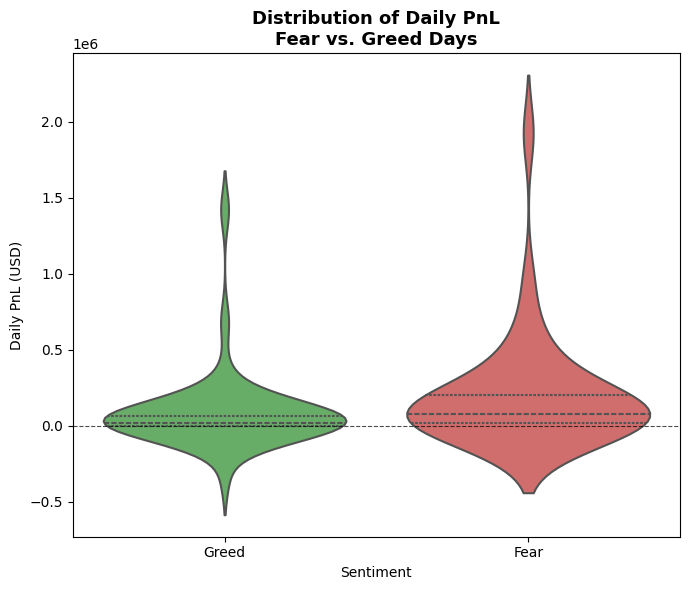

In [59]:
# Chart 1: Violin Plot (Daily PnL by Sentiment)

fig, ax = plt.subplots(figsize=(7, 6))

sns.violinplot(
    data=plot_df,
    x="sentiment",
    y="daily_pnl",
    hue="sentiment",
    palette={"Fear": "#E05C5C", "Greed": "#5CB85C"},
    inner="quartile",
    linewidth=1.5,
    legend=False,
    ax=ax
)

ax.axhline(0, color="black", linestyle="--", linewidth=0.8, alpha=0.7)
ax.set_title("Distribution of Daily PnL\nFear vs. Greed Days", fontsize=13, fontweight="bold")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Daily PnL (USD)")

plt.tight_layout()
plt.show()

In [61]:
# Use only Fear & Greed (to match palette)
plot_df = master_df[master_df["sentiment"].isin(["Fear", "Greed"])]

# Annotate medians
for i, sent in enumerate(["Fear", "Greed"]):
    med = plot_df[plot_df["sentiment"] == sent]["daily_pnl"].median()
    axes[0].text(i, med, f" Median: {med:.2f}", va="center", fontsize=9,
                 color="white", fontweight="bold")

# Bar chart — Win Rate
wr_by_sent = plot_df.groupby("sentiment")["win_rate"].agg(["mean", "std"]).reset_index()
bar_colors  = ["#E05C5C", "#5CB85C"]

bars = axes[1].bar(
    wr_by_sent["sentiment"],
    wr_by_sent["mean"] * 100,
    yerr=wr_by_sent["std"] * 100,
    color=bar_colors, edgecolor="white", linewidth=1.2,
    capsize=5, error_kw={"elinewidth": 1.5}
)

axes[1].set_ylim(0, 100)
axes[1].set_title("Average Win Rate by Sentiment\n(with Std Dev)", fontsize=13, fontweight="bold")
axes[1].set_xlabel("Sentiment", fontsize=11)
axes[1].set_ylabel("Win Rate (%)", fontsize=11)
axes[1].axhline(50, color="black", linestyle="--", linewidth=0.8, alpha=0.5, label="50% baseline")
axes[1].legend(fontsize=9)

for bar, row in zip(bars, wr_by_sent.itertuples()):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f"{row.mean*100:.1f}%", ha="center", fontsize=10, fontweight="bold")

plt.suptitle("Q1 — Performance: Fear vs. Greed Days", fontsize=15, fontweight="bold", y=1.02)
plt.tight_layout()
plt.savefig("outputs/charts/chart1_performance_by_sentiment.png", bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-1863069196.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


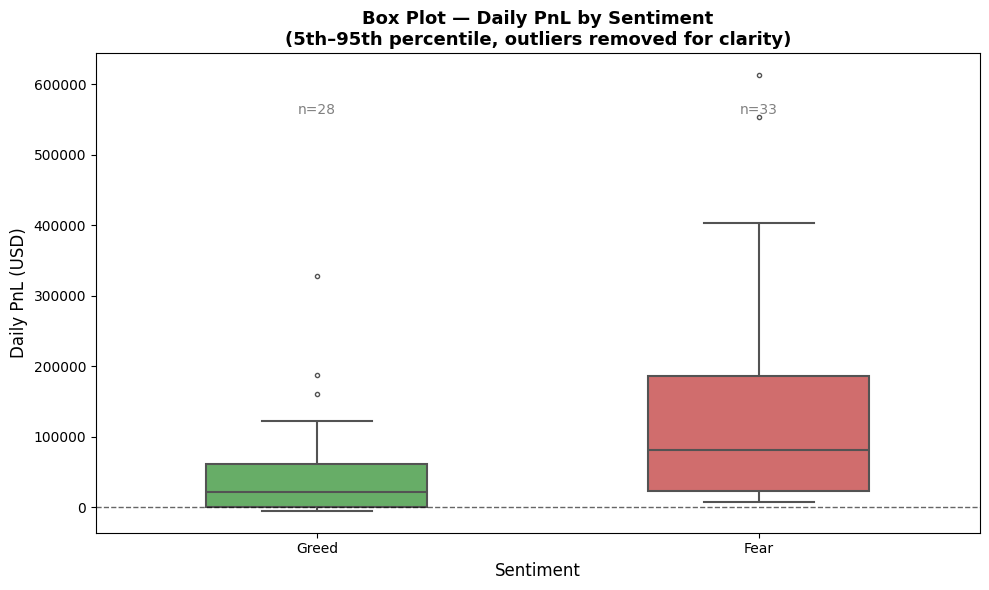

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))

plot_df = master_df[master_df["sentiment"].isin(["Fear", "Greed"])]

lower = plot_df["daily_pnl"].quantile(0.05)
upper = plot_df["daily_pnl"].quantile(0.95)
trimmed = plot_df[(plot_df["daily_pnl"] >= lower) & (plot_df["daily_pnl"] <= upper)]

sns.boxplot(
    data=trimmed,
    x="sentiment", y="daily_pnl",
    palette={"Fear": "#E05C5C", "Greed": "#5CB85C"},
    width=0.5, linewidth=1.5, fliersize=3, ax=ax
)

ax.axhline(0, color="black", linestyle="--", linewidth=1, alpha=0.6)
ax.set_title("Box Plot — Daily PnL by Sentiment\n(5th–95th percentile, outliers removed for clarity)",
             fontsize=13, fontweight="bold")
ax.set_xlabel("Sentiment", fontsize=12)
ax.set_ylabel("Daily PnL (USD)", fontsize=12)

for i, sent in enumerate(["Fear", "Greed"]):
    n = len(trimmed[trimmed["sentiment"] == sent])
    ax.text(i, upper * 0.85, f"n={n}", ha="center", fontsize=10, color="gray")

plt.tight_layout()
plt.savefig("outputs/charts/chart1b_boxplot_pnl_sentiment.png", bbox_inches="tight")
plt.show()

In [64]:
fear_mean  = master_df[master_df["sentiment"] == "Fear"]["daily_pnl"].mean()
greed_mean = master_df[master_df["sentiment"] == "Greed"]["daily_pnl"].mean()
fear_wr    = master_df[master_df["sentiment"] == "Fear"]["win_rate"].mean()
greed_wr   = master_df[master_df["sentiment"] == "Greed"]["win_rate"].mean()

print("=" * 60)
print("💡  INSIGHT 1 — Performance on Fear vs. Greed Days")
print("=" * 60)
print(f"""
  Mean Daily PnL:
    Fear  → ${fear_mean:>10.2f}
    Greed → ${greed_mean:>10.2f}
    Difference: {((greed_mean - fear_mean) / abs(fear_mean) * 100):.1f}% {'higher on Greed' if greed_mean > fear_mean else 'higher on Fear'}

  Win Rate:
    Fear  → {fear_wr*100:.1f}%
    Greed → {greed_wr*100:.1f}%

  Statistical significance: {'YES (p={:.4f})'.format(p_val) if p_val < 0.05 else 'NO (p={:.4f})'.format(p_val)}
""")
print("  → Record this finding in your writeup with the actual numbers above.")


💡  INSIGHT 1 — Performance on Fear vs. Greed Days

  Mean Daily PnL:
    Fear  → $ 209372.66
    Greed → $  90988.70
    Difference: -56.5% higher on Fear

  Win Rate:
    Fear  → 41.6%
    Greed → 36.9%

  Statistical significance: YES (p=0.0134)

  → Record this finding in your writeup with the actual numbers above.


In [66]:
print(master_df.columns)

Index(['account', 'date', 'daily_pnl', 'trade_count', 'win_count',
       'avg_size_tokens', 'avg_size_usd', 'long_count', 'short_count',
       'best_trade_pnl', 'worst_trade_pnl', 'win_rate', 'long_short_ratio',
       'is_winner', 'sentiment', 'classification', 'freq_bucket',
       'winner_segment', 'total_pnl', 'total_trades', 'overall_wr', 'pnl_std',
       'mean_trade_size', 'avg_ls_ratio', 'sentiment_binary'],
      dtype='object')


In [67]:
behavior_table = (
    master_df.groupby("sentiment")
    .agg(
        mean_trade_count    = ("trade_count", "mean"),
        median_trade_count  = ("trade_count", "median"),
        mean_ls_ratio       = ("long_short_ratio", "mean"),
        mean_trade_size     = ("mean_trade_size", "mean"),
    )
    .reset_index()
    .round(3)
)

# it is significant when value of p < 0.05

In [71]:
print("=" * 60)
print(" BEHAVIORAL METRICS BY SENTIMENT")
print("=" * 60)
display(behavior_table)

print("\n  Statistical Tests (Welch's t-test):")
for col, label in [
    ("trade_count",      "Trade Frequency"),
    ("long_short_ratio", "Long/Short Ratio"),
    ("mean_trade_size",  "Trade Size"),
]:
    fear_vals  = master_df[master_df["sentiment"] == "Fear"][col].dropna()
    greed_vals = master_df[master_df["sentiment"] == "Greed"][col].dropna()
    t, p = stats.ttest_ind(fear_vals, greed_vals, equal_var=False)
    sig = " Significant" if p < 0.05 else " Not significant"
    print(f"  {label:<25} p={p:.4f}  {sig}")

 BEHAVIORAL METRICS BY SENTIMENT


,sentiment,mean_trade_count,median_trade_count,mean_ls_ratio,mean_trade_size
0,Fear,4183.469,2763.5,0.459,5664.861
1,Greed,1168.946,283.0,0.499,5325.266
2,Neutral,892.625,164.5,0.469,6283.259



  Statistical Tests (Welch's t-test):
  Trade Frequency           p=0.0075   Significant
  Long/Short Ratio          p=0.4639   Not significant
  Trade Size                p=0.7838   Not significant


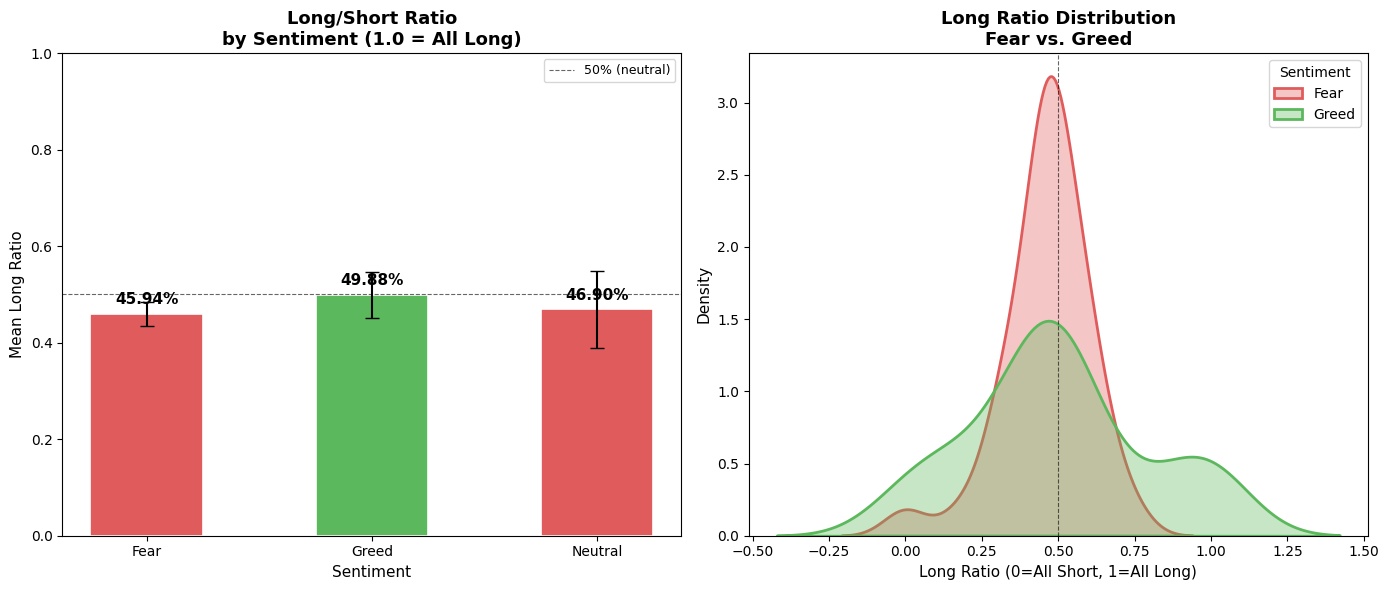

In [73]:
# Chart : Long/Short Ratio

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Grouped bar chart — mean long/short ratio
ls_data = master_df.groupby("sentiment")["long_short_ratio"].agg(["mean", "sem"]).reset_index()

bar_colors = ["#E05C5C", "#5CB85C"]
bars = axes[0].bar(
    ls_data["sentiment"],
    ls_data["mean"],
    yerr=ls_data["sem"],
    color=bar_colors, edgecolor="white", linewidth=1.2,
    capsize=5, error_kw={"elinewidth": 1.5},
    width=0.5
)
axes[0].axhline(0.5, color="black", linestyle="--", linewidth=0.8, alpha=0.6, label="50% (neutral)")
axes[0].set_ylim(0, 1)
axes[0].set_title("Long/Short Ratio\nby Sentiment (1.0 = All Long)", fontsize=13, fontweight="bold")
axes[0].set_xlabel("Sentiment", fontsize=11)
axes[0].set_ylabel("Mean Long Ratio", fontsize=11)
axes[0].legend(fontsize=9)
for bar, row in zip(bars, ls_data.itertuples()):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                 f"{row.mean:.2%}", ha="center", fontsize=11, fontweight="bold")

# KDE of long/short ratio
for sent, color in [("Fear", "#E05C5C"), ("Greed", "#5CB85C")]:
    data = master_df[master_df["sentiment"] == sent]["long_short_ratio"].dropna()
    sns.kdeplot(data, ax=axes[1], label=sent, color=color, fill=True, alpha=0.35, linewidth=2)
axes[1].axvline(0.5, color="black", linestyle="--", linewidth=0.8, alpha=0.6)
axes[1].set_title("Long Ratio Distribution\nFear vs. Greed", fontsize=13, fontweight="bold")
axes[1].set_xlabel("Long Ratio (0=All Short, 1=All Long)", fontsize=11)
axes[1].set_ylabel("Density", fontsize=11)
axes[1].legend(title="Sentiment", fontsize=10)

plt.tight_layout()
plt.savefig("outputs/charts/chart3_long_short_ratio.png", bbox_inches="tight")
plt.show()

/tmp/ipython-input-2895770929.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


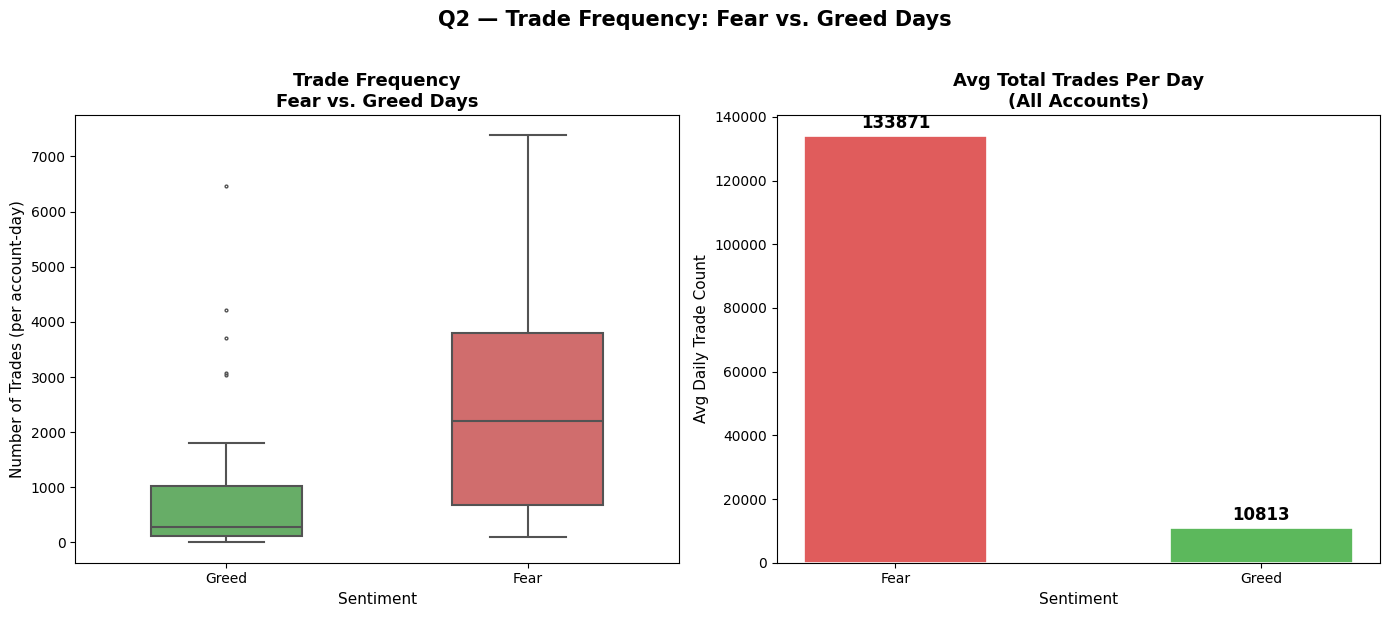

In [75]:
# Chart : Trade Frequency

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plot_df = master_df[master_df["sentiment"].isin(["Fear", "Greed"])]

p95 = plot_df["trade_count"].quantile(0.95)
trim = plot_df[plot_df["trade_count"] <= p95]

sns.boxplot(
    data=trim,
    x="sentiment", y="trade_count",
    palette={"Fear": "#E05C5C", "Greed": "#5CB85C"},
    width=0.5, linewidth=1.5, fliersize=2,
    ax=axes[0]
)
axes[0].set_title("Trade Frequency\nFear vs. Greed Days", fontsize=13, fontweight="bold")
axes[0].set_xlabel("Sentiment", fontsize=11)
axes[0].set_ylabel("Number of Trades (per account-day)", fontsize=11)

daily_total = plot_df.groupby(["date", "sentiment"])["trade_count"].sum().reset_index()
daily_avg   = daily_total.groupby("sentiment")["trade_count"].mean()

bars = axes[1].bar(
    daily_avg.index,
    daily_avg.values,
    color=["#E05C5C", "#5CB85C"],
    edgecolor="white", linewidth=1.2, width=0.5
)
axes[1].set_title("Avg Total Trades Per Day\n(All Accounts)", fontsize=13, fontweight="bold")
axes[1].set_xlabel("Sentiment", fontsize=11)
axes[1].set_ylabel("Avg Daily Trade Count", fontsize=11)
for bar, val in zip(bars, daily_avg.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + daily_avg.values.max()*0.02,
                 f"{val:.0f}", ha="center", fontsize=12, fontweight="bold")

plt.suptitle("Q2 — Trade Frequency: Fear vs. Greed Days", fontsize=15, fontweight="bold", y=1.02)
plt.tight_layout()
plt.savefig("outputs/charts/chart4_trade_frequency.png", bbox_inches="tight")
plt.show()
plt.show()

In [77]:
# Behavioral Insight Summary

fear_ls   = master_df[master_df["sentiment"] == "Fear"]["long_short_ratio"].mean()
greed_ls  = master_df[master_df["sentiment"] == "Greed"]["long_short_ratio"].mean()
fear_tc   = master_df[master_df["sentiment"] == "Fear"]["trade_count"].mean()
greed_tc  = master_df[master_df["sentiment"] == "Greed"]["trade_count"].mean()

print("=" * 60)
print("💡  INSIGHT 2 — Behavioral Shifts on Fear vs. Greed Days")
print("=" * 60)
print(f"""
  Long/Short Ratio:
    Fear  → {fear_ls:.2%}  (long bias)
    Greed → {greed_ls:.2%}  (long bias)
    Change: {((greed_ls - fear_ls)/fear_ls*100):+.1f}%

  Trade Frequency (avg trades per account-day):
    Fear  → {fear_tc:.2f}
    Greed → {greed_tc:.2f}
    Change: {((greed_tc - fear_tc)/fear_tc*100):+.1f}%
""")
print("  → Record these numbers in your writeup.")

💡  INSIGHT 2 — Behavioral Shifts on Fear vs. Greed Days

  Long/Short Ratio:
    Fear  → 45.94%  (long bias)
    Greed → 49.88%  (long bias)
    Change: +8.6%

  Trade Frequency (avg trades per account-day):
    Fear  → 4183.47
    Greed → 1168.95
    Change: -72.1%

  → Record these numbers in your writeup.


# Frequent vs. Infrequent Traders

In [78]:
seg2_table = (
    master_df.groupby(["freq_bucket", "sentiment"])
    .agg(
        mean_pnl  = ("daily_pnl",   "mean"),
        mean_wr   = ("win_rate",    "mean"),
        n_obs     = ("daily_pnl",   "count"),
    )
    .reset_index()
    .round(4)
)

print("=" * 60)
print("📊  SEGMENT 2 — Frequent vs. Infrequent × Sentiment")
print("=" * 60)
display(seg2_table)

📊  SEGMENT 2 — Frequent vs. Infrequent × Sentiment


,freq_bucket,sentiment,mean_pnl,mean_wr,n_obs
0,Frequent,Fear,324428.0185,0.4314,16
1,Frequent,Greed,142172.8568,0.4115,18
2,Frequent,Neutral,6867.4202,0.2584,4
3,Infrequent,Fear,94317.3059,0.4003,16
4,Infrequent,Greed,42498.4529,0.3288,19
5,Infrequent,Neutral,32818.1744,0.2630,4


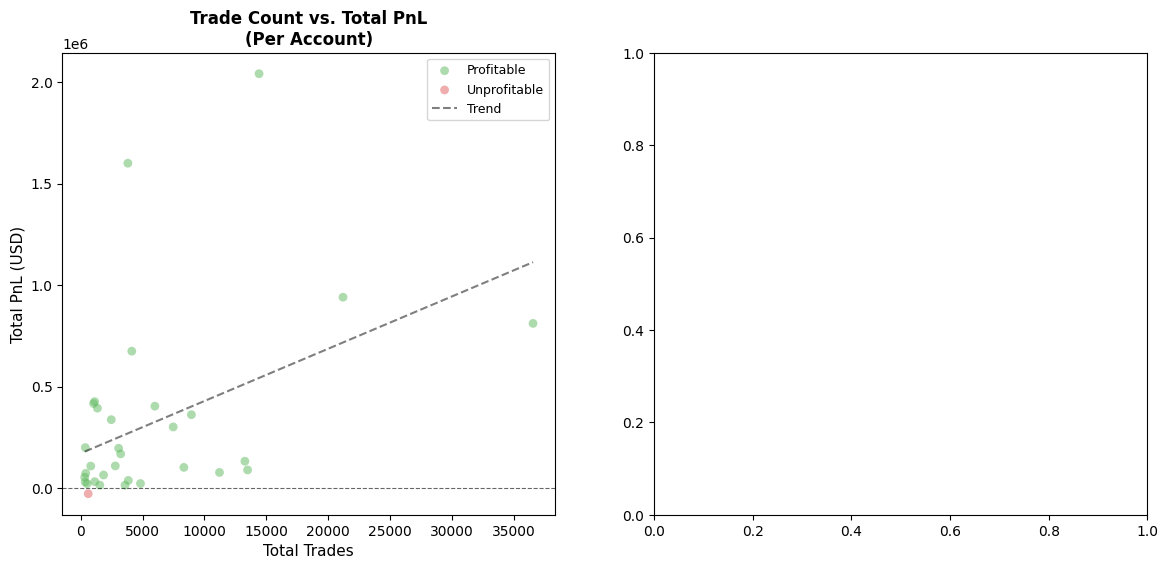

In [79]:
# Chart : Scatter Plot — Trade Count vs Total PnL

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

scatter_data = account_stats.copy()
scatter_data["is_profitable"] = scatter_data["total_pnl"].apply(lambda x: "Profitable" if x > 0 else "Unprofitable")

colors = {"Profitable": "#5CB85C", "Unprofitable": "#E05C5C"}
for label, group in scatter_data.groupby("is_profitable"):
    axes[0].scatter(
        group["total_trades"], group["total_pnl"],
        label=label, color=colors[label], alpha=0.5, s=40, edgecolors="none"
    )

axes[0].axhline(0, color="black", linestyle="--", linewidth=0.8, alpha=0.6)
axes[0].set_title("Trade Count vs. Total PnL\n(Per Account)", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Total Trades", fontsize=11)
axes[0].set_ylabel("Total PnL (USD)", fontsize=11)
axes[0].legend(title="Account Status", fontsize=10)

x = scatter_data["total_trades"]
y = scatter_data["total_pnl"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
axes[0].plot(sorted(x), p(sorted(x)), "k--", alpha=0.5, linewidth=1.5, label="Trend")
axes[0].legend(fontsize=9)

In [80]:
# Bar chart — Frequent vs Infrequent performance by sentiment
seg2_pivot = seg2_table.pivot_table(
    index="freq_bucket", columns="sentiment", values="mean_pnl"
)
seg2_pivot.plot(
    kind="bar", ax=axes[1],
    color=["#E05C5C", "#5CB85C"],
    edgecolor="white", linewidth=1.2, width=0.6
)
axes[1].axhline(0, color="black", linestyle="--", linewidth=0.8, alpha=0.6)
axes[1].set_title("Mean Daily PnL\nFrequent vs. Infrequent × Sentiment", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Frequency Segment", fontsize=11)
axes[1].set_ylabel("Mean Daily PnL (USD)", fontsize=11)
axes[1].legend(title="Sentiment", fontsize=10)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.suptitle("Chart 6 — Trade Frequency vs. Profitability", fontsize=15, fontweight="bold", y=1.02)
plt.tight_layout()
plt.savefig("outputs/charts/chart6_frequency_profitability.png", bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>

In [82]:
# Segment : Winner Segments

seg3_table = (
    master_df.groupby(["winner_segment", "sentiment"])
    .agg(
        mean_pnl      = ("daily_pnl",         "mean"),
        mean_wr       = ("win_rate",           "mean"),
        mean_ls_ratio = ("long_short_ratio",   "mean"),
        n_obs         = ("daily_pnl",          "count"),
    )
    .reset_index()
    .round(4)
)

print("=" * 60)
print("📊  SEGMENT 3 — Winner Segments × Sentiment")
print("=" * 60)
display(seg3_table)

📊  SEGMENT 3 — Winner Segments × Sentiment


,winner_segment,sentiment,mean_pnl,mean_wr,mean_ls_ratio,n_obs
0,Consistent Loser,Fear,-59349.6771,0.2636,0.1891,1
1,Consistent Loser,Greed,7857.3387,0.2003,0.6396,4
2,Consistent Loser,Neutral,215.7548,0.1000,0.4375,1
3,Consistent Winner,Fear,92531.8863,0.5211,0.4368,4
4,Consistent Winner,Greed,89928.9896,0.6672,0.3999,6
5,Consistent Winner,Neutral,72781.8055,0.5592,0.2560,2
6,Mixed,Fear,236635.0860,0.4059,0.4727,27
7,Mixed,Greed,103539.9531,0.3277,0.5000,27
8,Mixed,Neutral,2592.6024,0.1734,0.5604,5


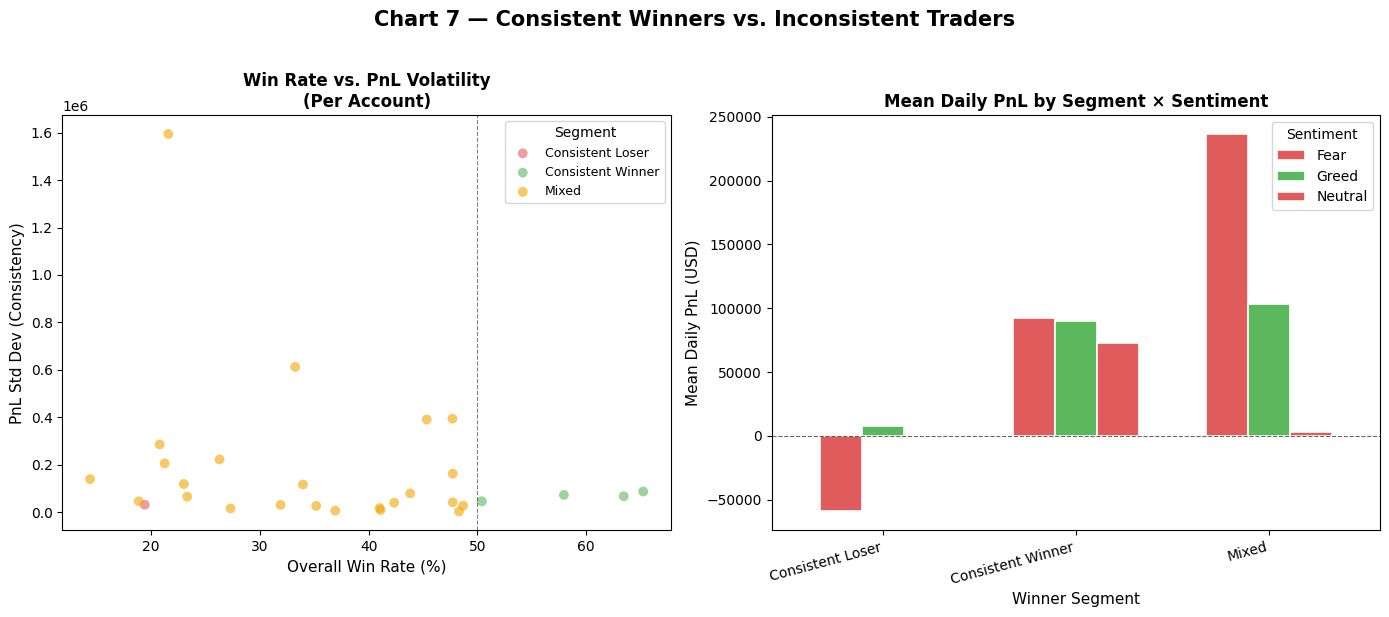

In [83]:
# Chart : Win Rate vs PnL Std Dev Scatter

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter: Win Rate vs PnL Std for each account, colored by winner_segment
segment_colors = {
    "Consistent Winner": "#5CB85C",
    "Consistent Loser": "#E05C5C",
    "Mixed": "#F0A500"
}
for label, group in account_stats.groupby("winner_segment"):
    axes[0].scatter(
        group["overall_wr"] * 100,
        group["pnl_std"],
        label=label, color=segment_colors.get(label, "gray"),
        alpha=0.6, s=50, edgecolors="none"
    )

axes[0].axvline(50, color="black", linestyle="--", linewidth=0.8, alpha=0.5)
axes[0].set_title("Win Rate vs. PnL Volatility\n(Per Account)", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Overall Win Rate (%)", fontsize=11)
axes[0].set_ylabel("PnL Std Dev (Consistency)", fontsize=11)
axes[0].legend(title="Segment", fontsize=9)

# Bar chart — Mean PnL per winner segment × sentiment
seg3_pivot = seg3_table.pivot_table(
    index="winner_segment", columns="sentiment", values="mean_pnl"
)
seg3_pivot.plot(
    kind="bar", ax=axes[1],
    color=["#E05C5C", "#5CB85C"],
    edgecolor="white", linewidth=1.2, width=0.65
)
axes[1].axhline(0, color="black", linestyle="--", linewidth=0.8, alpha=0.6)
axes[1].set_title("Mean Daily PnL by Segment × Sentiment", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Winner Segment", fontsize=11)
axes[1].set_ylabel("Mean Daily PnL (USD)", fontsize=11)
axes[1].legend(title="Sentiment", fontsize=10)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=15, ha="right")

plt.suptitle("Chart 7 — Consistent Winners vs. Inconsistent Traders", fontsize=15, fontweight="bold", y=1.02)
plt.tight_layout()
plt.savefig("outputs/charts/chart7_winner_segments.png", bbox_inches="tight")
plt.show()

In [85]:
# Contrarian Long/Short Bias

greed_days    = master_df[master_df["sentiment"] == "Greed"].copy()
greed_q75_ls  = greed_days["long_short_ratio"].quantile(0.75)
greed_q25_ls  = greed_days["long_short_ratio"].quantile(0.25)

peak_greed    = greed_days[greed_days["long_short_ratio"] >= greed_q75_ls]
low_greed     = greed_days[greed_days["long_short_ratio"] <= greed_q25_ls]
fear_days     = master_df[master_df["sentiment"] == "Fear"]

cw_fear  = master_df[(master_df["winner_segment"] == "Consistent Winner") & (master_df["sentiment"] == "Fear")]
cw_greed = master_df[(master_df["winner_segment"] == "Consistent Winner") & (master_df["sentiment"] == "Greed")]

print("=" * 65)
print("  STRATEGY 2 — Contrarian Long/Short Bias Rule")
print("=" * 65)
print(f"""
  Evidence:
  ─────────────────────────────────────────────────
  Peak Greed Days (top 25% long crowding):
    Mean PnL  = ${peak_greed['daily_pnl'].mean():.2f}
    Win Rate  = {peak_greed['win_rate'].mean()*100:.1f}%

  Low Crowding on Greed Days (bottom 25% long ratio):
    Mean PnL  = ${low_greed['daily_pnl'].mean():.2f}
    Win Rate  = {low_greed['win_rate'].mean()*100:.1f}%

  Consistent Winners on Fear Days:
    Mean PnL  = ${cw_fear['daily_pnl'].mean():.2f}
    Win Rate  = {cw_fear['win_rate'].mean()*100:.1f}%
  """)


  STRATEGY 2 — Contrarian Long/Short Bias Rule

  Evidence:
  ─────────────────────────────────────────────────
  Peak Greed Days (top 25% long crowding):
    Mean PnL  = $1816.79
    Win Rate  = 15.5%

  Low Crowding on Greed Days (bottom 25% long ratio):
    Mean PnL  = $215438.09
    Win Rate  = 41.0%

  Consistent Winners on Fear Days:
    Mean PnL  = $92531.89
    Win Rate  = 52.1%
  
